# *Lecture 16*

# Differential Equations

| |
|:---:|
|Selected Content [From **COMPUTATIONAL PHYSICS**, 3rd Ed, 2015](http://physics.oregonstate.edu/~rubin/Books/CPbook/index.html) <br>RH Landau, MJ Paez, and CC Bordeianu (deceased) <br>Copyrights: <br> [Wiley-VCH, Berlin;](http://www.wiley-vch.de/publish/en/books/ISBN3-527-41315-4/) and [Wiley & Sons, New York](http://www.wiley.com/WileyCDA/WileyTitle/productCd-3527413154.html)<br>  R Landau, Oregon State Unv, <br>MJ Paez, Univ Antioquia,<br> C Bordeianu, Univ Bucharest, 2015.<br> Support by National Science Foundation.|


## Important Note/Erratum

In the textbook by Landau, *et al.*, the ABM method has identical equations and coefficients to the 4th-order Runge-Kutta method. This is not the case at all! The problem is that there is a typo in the text, repeating the Runge-Kutta formula instead of the Adams-Bashforth-Moulton equations.

Remember that the difference between Runge-Kutta and Adams methods is that Runge-Kutta is a single-step method -- it uses only the most recent value of $y_n$ to calculate $y_{n+1}$.  The Adams methods are multi-step methods, and they use previous values $y_{n-1}, y_{n-2}$, etc.

# More Details and Higher-Order Methods

## Adams-Bashforth methods

The goal is to evaluate the integral in the following equation:

$$y_{n+1} = y_n + \int_{t_n}^{t_{n+1}} f(t,y) dt$$

We could use a 2-term interpolating polynomial, which will give a *linear* approximation:

$$f \approx \frac{t - t_{n-1}}{h} f_n - \frac{t - t_n}{h} f_{n-1} + \mathcal{O}(h^2)$$

Then we perform the integral with this **explicit** approximation for $f$, and the result is the 2-step **Adams-Bashforth method**:

(I give the long proof here because you asked in Lecture 15.)

$$\begin{align}
y_{n+1} &= y_n + \frac{\frac{1}{2}t^2 - t_{n-1}t}{h} f_n |^{t_{n+1}}_{t_n}  - \frac{\frac{1}{2}t^2 - t_{n}t}{h} f_{n-1} |^{t_{n+1}}_{t_n} \\
&= y_n + \frac{\frac{1}{2}\left(t_{n+1}^2 - t_n^2 \right)}{h} f_n - \frac{t_{n-1}\left(t_{n+1}-t_n\right)}{h} f_n - \frac{\frac{1}{2} \left( t_{n+1}^2 - t_n^2 \right)}{h} f_{n-1} + \frac{t_n \left( t_{n+1}- t_n\right)}{h} f_{n-1}\\
&= y_n + \frac{f_n}{2h} \left(2ht_n + h^2\right) - \frac{t_{n-1} h}{h} f_n - \frac{f_{n-1}}{2h} \left( 2ht_n + h^2 \right) + \frac{t_n h}{h} f_{n-1} \\
&= y_n + f_n t_n + \frac{f_n}{2} h - t_{n-1}f_n - f_{n-1} t_n - \frac{f_{n-1}}{2}h + t_n f_{n-1}\\
&= y_n + f_n h + \frac{1}{2} h \left( f_n - f_{n-1} \right) \\
&= y_n + \frac{3}{2} f_n h - \frac{1}{2} f_{n-1} h \\
y_{n+1} &= y_n + h\left( \frac{3}{2} f_n - \frac{1}{2} f_{n-1} \right) + \mathcal{O}(h^3)
\end{align}$$

It is called "2-step" because the function $f$ is evaluated at two steps: $f_n = f(t_n, y_n)$ and $f_{n-1} = f(t_{n-1}, y_{n-1})$.

If we use a 4-term interpolating polynomial, we will get a *cubic* approximation for $f$ over the interval, resulting in the 4-step Adams-Bashforth method:

$$y_{n+1} = y_n + \frac{h}{24}\left(55 f_n - 59 f_{n-1} + 37 f_{n-2} - 9 f_{n-3} \right)
+ \mathcal{O}(h^4)$$

Note that the derivative $f$ is evaluated at 4 places in this method.  Like the Runge-Kutta, the 4th order seems to be the best trade-off of precision and performance.  The Adams-Bashforth *explicit* method can be used as the *predictor* in a predictor-corrector scheme.


## Adams-Moulton methods

These methods use an implicit approximation to the integrand $f(t,y)$ over the relevant interval.
Instead of using an interpolating polynomial with nodes at $(t, t-h, t-2h, t-3h)$, the Adams-Moulton methods use an interpolating polynomial with nodes at $(t+h, t, t-h, t-2h)$.  It is the evaluation at $t+h$ that makes these methods implicit instead of explicit.

After putting the 4-term interpolating polynomial into the integral, we find the 3-step Adams-Moulton formula (we are going back only 3 steps):

$$y_{n+1} = y_n + \frac{h}{24}\left(9 f_{n+1} + 19 f_n + 5 f_{n-1} - f_{n-2} \right)
+ \mathcal{O}(h^5)$$

The precision of this method is better, but we need to know the value of $f_{n+1}$ to get started.

## Adams-Bashforth-Moulton predictor-corrector

The following code uses 4th-order Runge-Kutta to find the first few values of $y$ explicitly.  Then it predicts a value for $y_{n+1}$ using the A-B method, so that the derivative can be evaluated.  Finally, it uses that prediction as input to the A-M method to achieve the best accuracy.

You may have noticed the statement "the correction can be used as an estimate of the error."
Check to see if this is true.

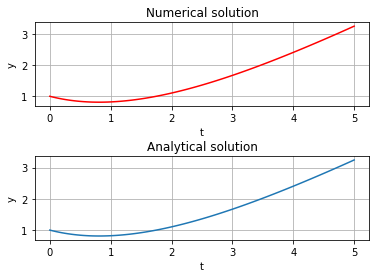

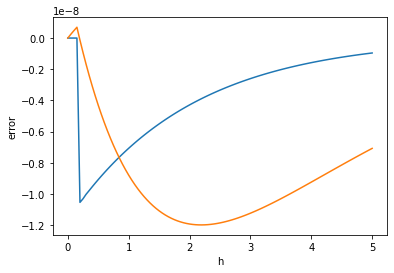

For h=0.050, error is -9.571e-10


In [1]:
# ABM.py, Notebook Version

# Solves example equation y' = (t - y)/2,    with y[0] = 1 over [0, 3]
import numpy as np
import matplotlib.pyplot as plt
N = 100                  # number of steps must be > 3
a = 0; b = 5.   # Endpoints, inital value
t = np.zeros( (N+1), float)
y = np.zeros( (N+1), float)
tt = np.zeros( (N+1), float)
yy = np.zeros( (N+1), float)
ee = np.zeros( (N+1), float)

def f(t, y):                     # function to return RHS's (force function)
    return  (t - y)/2.0

def rk4(t, y, h1):                  # function for rk4 init
    for i in range(0, N):
        t  = h1 * i
        k0 = h1 * f( t, y[i] )
        k1 = h1 * f( t + h1/2., y[i] + k0/2. )
        k2 = h1 * f( t + h1/2., y[i] + k1/2. )
        k3 = h1 * f( t + h1, y[i] + k2 )
        y[i + 1] = y[i]  +  (1./6.) * (k0  +  2.*k1  +  2.*k2 + k3)
    return y[3]

# Compute 3 additional starting values using rk
h = (b  -  a) / N
t[0] = a;y[0] = 1.00
F0   = f(t[0], y[0])

for k in range(1, 4):
    t[k] = a  +  k * h
    
y[1]  = rk4(t[1], y, h)
y[2]  = rk4(t[2], y, h)
y[3] = rk4(t[3], y, h)
F1 = f(t[1], y[1])
F2 = f(t[2], y[2])
F3 = f(t[3], y[3])
h2 = h / 24.00

for k in range(3, N):                                            
      p = y[k]  +  h2 * ( - 9.00*F0  +  37.00*F1  -  59.00*F2  +  55.00*F3) # Result from A-B predictor
      t[k + 1] = a  +  h * (k + 1)                                          # Next abscissa
      F4 = f(t[k + 1], p)                                                   # Evaluate f(t, y) using guess p
      y[k + 1] = y[k]  +  h2 * (F1  -  5.*F2  +  19.*F3  +  9.*F4)          # Result from A-M Corrector
      F0 = F1                                                               # Update values
      F1 = F2
      F2 = F3
      F3 = f(t[k + 1], y[k + 1])
      ee[k+1] = y[k+1] - p
     
for k in range( 0, N+1 ):
   # This is the exact analytical solution, for comparison
   yy[k]= (3.*np.exp( - t[k]/2.) - 2. + t[k]) 
   
plt.subplot(2,1,1)    
plt.plot(t,y,'r')
plt.grid()
plt.title('Numerical solution')
plt.xlabel('t')
plt.ylabel('y')
plt.subplot(2,1,2)
plt.plot(t,yy)
plt.grid()
plt.title('Analytical solution')
plt.xlabel('t')
plt.ylabel('y')
plt.subplots_adjust(hspace=0.6)
plt.show()
plt.plot(t, ee)
plt.plot(t, y-yy)
plt.xlabel('h')
plt.ylabel('error')
plt.show()
print("For h=%.3f, error is %.3e" % (h, ee[-1]))

### Follow-up on Error Estimate in Euler's Method

The claim from last time:
* Euler's method has a local error for each step of $\mathcal{O}(h^2)$.
* If there are $N \sim 1/h$ steps, then the total error for the method scales as $N\mathcal{O}(h^2) =  \mathcal{O}(h)$.  
* This is the same as $\mathcal{O}(1/N)$.

Let's check this statement and get some intuition for what it means.

Let's take the example $x' = t^2$, with an initial value $x(1)=1/3$.
What is the value of $x$ at $t=2$?

Obviously the correct solution is $x(t) = t^3/3$, and the value at $t=2$ will be $x(2)=8/3$.

N =  101, h = 0.010000, value = 2.651683, error = 1.498333e-02
N =  201, h = 0.005000, value = 2.659171, error = 7.495833e-03
N =  401, h = 0.002500, value = 2.662918, error = 3.748958e-03
N =  801, h = 0.001250, value = 2.664792, error = 1.874740e-03
N = 1601, h = 0.000625, value = 2.665729, error = 9.374349e-04


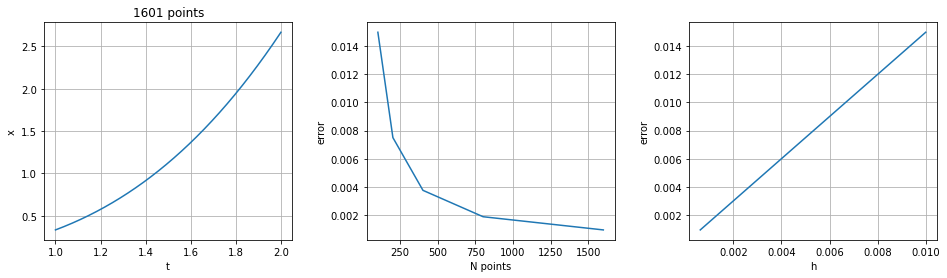

In [2]:
# Euler's method
import numpy as np
import matplotlib.pyplot as plt

def f(x, t):
    return t**2
 
N_values = []
h_values = []
error_values = []
for N in (101, 201, 401, 801, 1601):
    t_values = np.linspace(1., 2., N)
    h = t_values[1] - t_values[0]
    x_values = np.zeros(N)
    x_values[0] = 1/3
    for i in range(N-1):
        x_values[i+1] = x_values[i] + h * f(x_values[i], t_values[i])
    error = 8/3 - x_values[-1]
    print("N = %4d, h = %f, value = %f, error = %e" % (N, h, x_values[-1], error))
    N_values.append(N)
    h_values.append(h)
    error_values.append(error)
  
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)    
plt.plot(t_values, x_values)
plt.xlabel('t')
plt.ylabel('x')
plt.title('%d points' % N)
plt.grid()
plt.subplots_adjust(wspace=0.3)
plt.subplot(1,3,2) 
plt.plot(N_values, error_values)
plt.xlabel('N points')
plt.ylabel('error')
plt.grid()
plt.subplot(1,3,3) 
plt.plot(h_values, error_values)
plt.xlabel('h')
plt.ylabel('error')
plt.grid()
plt.show()

## Physics Application: Trajectories
    
Let's use these techniques to solve for a falling rock.
The differential equation is Newton's Second Law:
$$\frac{d^2 y}{dt^2} = \frac{F}{m} = \frac{mg}{m} = -g$$
But we haven't seen how to do second-order differential equations yet.
The best we can do is solve for the velocity:
$$\frac{dv}{dt} = -g$$

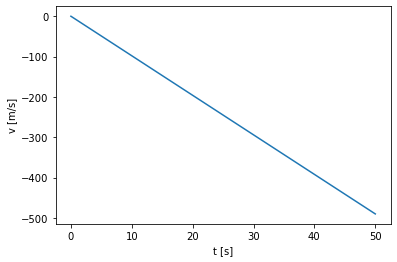

In [3]:
# Euler's method
import numpy as np
import matplotlib.pyplot as plt

def dvdt(t):
    return -9.8 # m/s^2
 
N = 101
N_values = []
(t_values, h) = np.linspace(0., 50., N, retstep=True)
v_values = np.zeros(N)
v_values[0] = 0 # v0
for i in range(N-1):
    v_values[i+1] = v_values[i] + h * dvdt(t_values[i])
    
plt.plot(t_values, v_values)
plt.xlabel('t [s]')
plt.ylabel('v [m/s]')
plt.show()

Hmm, I wonder if I can solve the next differential equation for y:
$$\frac{dy}{dt} = v$$

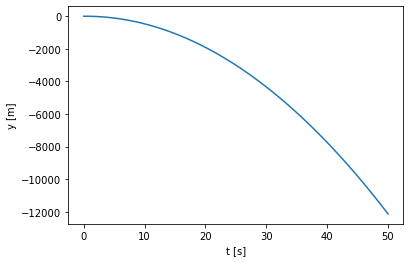

In [4]:
# Assume dydt = v
y_values = np.zeros(N)
y_values[0] = 0 # y0
for i in range(N-1):
    y_values[i+1] = y_values[i] + h * v_values[i]
    
plt.plot(t_values, y_values)
plt.xlabel('t [s]')
plt.ylabel('y [m]')
plt.show()

This gives us a really good hint at how to solve the second-order equations in general.

## Systems of ODE's

Now we will return to the topic: systems of first-order ordinary differential equations.
You may have notice that we did not give any methods yet for solving second-order differential equations; all of these numerical methods were limited to solving first-order equations.

Now we will use the systems of first-order ODE's to deal with second-order differential equations.

## Vector Form for System of ODE’s

A standard form is to express ODE’s of *any order* as $N$ simultaneous first-order ODE’s in $N$ unknowns defined to be $y^{(0)}, \dots y^{(N − 1)}$.
A system of such equations might look like this:

 $$\begin{align}
\frac{dy^{(0)}}{dt} & =     f^{(0)}(t, y^{(i)}),\\
\frac{dy^{(1)}}{dt} & =  f^{(1)}(t, y^{(i)}),\\
\vdots  \\
\frac{dy^{(N-1)}}{dt} & =  f^{(N-1)}(t, y^{(i)}),
 \end{align}$$
 
 where $f$ can depend on any (or all) $y^{(i)})$, but not on any derivative $dy^{(i)}/dt$. These equations can
be expressed as $N$-dimensional vectors (indicated here in **boldface**) $\bf y$ and $\bf f$:

$$
   \frac{d\mathbf{y}(t)}{dt} = \mathbf{f}(t,\mathbf{y})
$$

with the specific definitions

$$\begin{align}
&\mathbf{y} =\begin{pmatrix}
    y^{(0)}(t)\\
    y^{(1)}(t)\\
    \vdots \\
    y^{(N-1)}(t)
    \end{pmatrix},\quad
&\mathbf{f} =\begin{pmatrix}
    f^{(0)}(t,\mathbf{y})\\
    f^{(1)}(t,\mathbf{y}) \\
    \vdots \\
f^{(N-1)}(t,\mathbf{y})
\end{pmatrix}.
 \end{align}$$

The advantage of such compact notation is that we can study the properties
of the ODE’s, as well as develop algorithms to solve them, by dealing
with the single equation without having to worry about the
individual components. 

### Example: Newton's Second Law

To see how this works, let us convert Newton’s
law

$$
\frac{d^{2}x}{dt^{2}}    =  \frac{1}{m}F\left(t,
x,\frac{dx}{dt}\right)$$

to this standard form. The rule is that the RHS may *not* contain any explicit
derivatives, although individual components of $y^{(i)}$ may
represent derivatives, by definition. To pull this off, we define the position $x$ as the first
dependent variable $y^{(0)}$, and the velocity $dx/dt$ as the second dependent variable $y^{(1)}$:

$$\begin{align}
y^{(0)}(t) &= x(t), \\
y^{(1)}(t) &= \frac{dx}{dt} = \frac{d y^{(0)}(t) } {dt}.
\end{align}$$

The second-order ODE (Newton's Law) now becomes two simultaneous first-order
ODE’s:

$$\begin{align}
\frac{dy^{(0)}}{dt} &= y^{(1)}(t) ,\\
\frac{dy^{(1)}}{dt}  &=
\frac{1}{m}F(t,y^{(0)},y^{(1)}).
\end{align}$$

This expresses the acceleration \[the second derivative in $t$\] as
the first derivative of the velocity \[$y^{(1)}$\]. These
equations are now in the standard vector form , with the derivative or
"force function" **f** having the two components

$$\begin{align}
f^{(0)} &= y^{(1)}(t) ,\\
f^{(1)} &=\frac{1}{m}F(t,y^{(0)},y^{(1)})
\end{align}$$

where $F$, as written, may be an explicit function of time as well as of position and
velocity.

### Vector Implementation of 4th-order Runge-Kutta method

We saw the simplified (1-variable) version of the Runge-Kutta method.
Now we restore the vector forms for $y$ and $f$, but maintain the same algorithms.
In this code, the `ydumb` variable is used to update the $\bf y$ vector before using it in the calculation of the derivative vector function $\bf f$.  This makes the implementation a bit more complicated than for the single ODE.

<IPython.core.display.Javascript object>


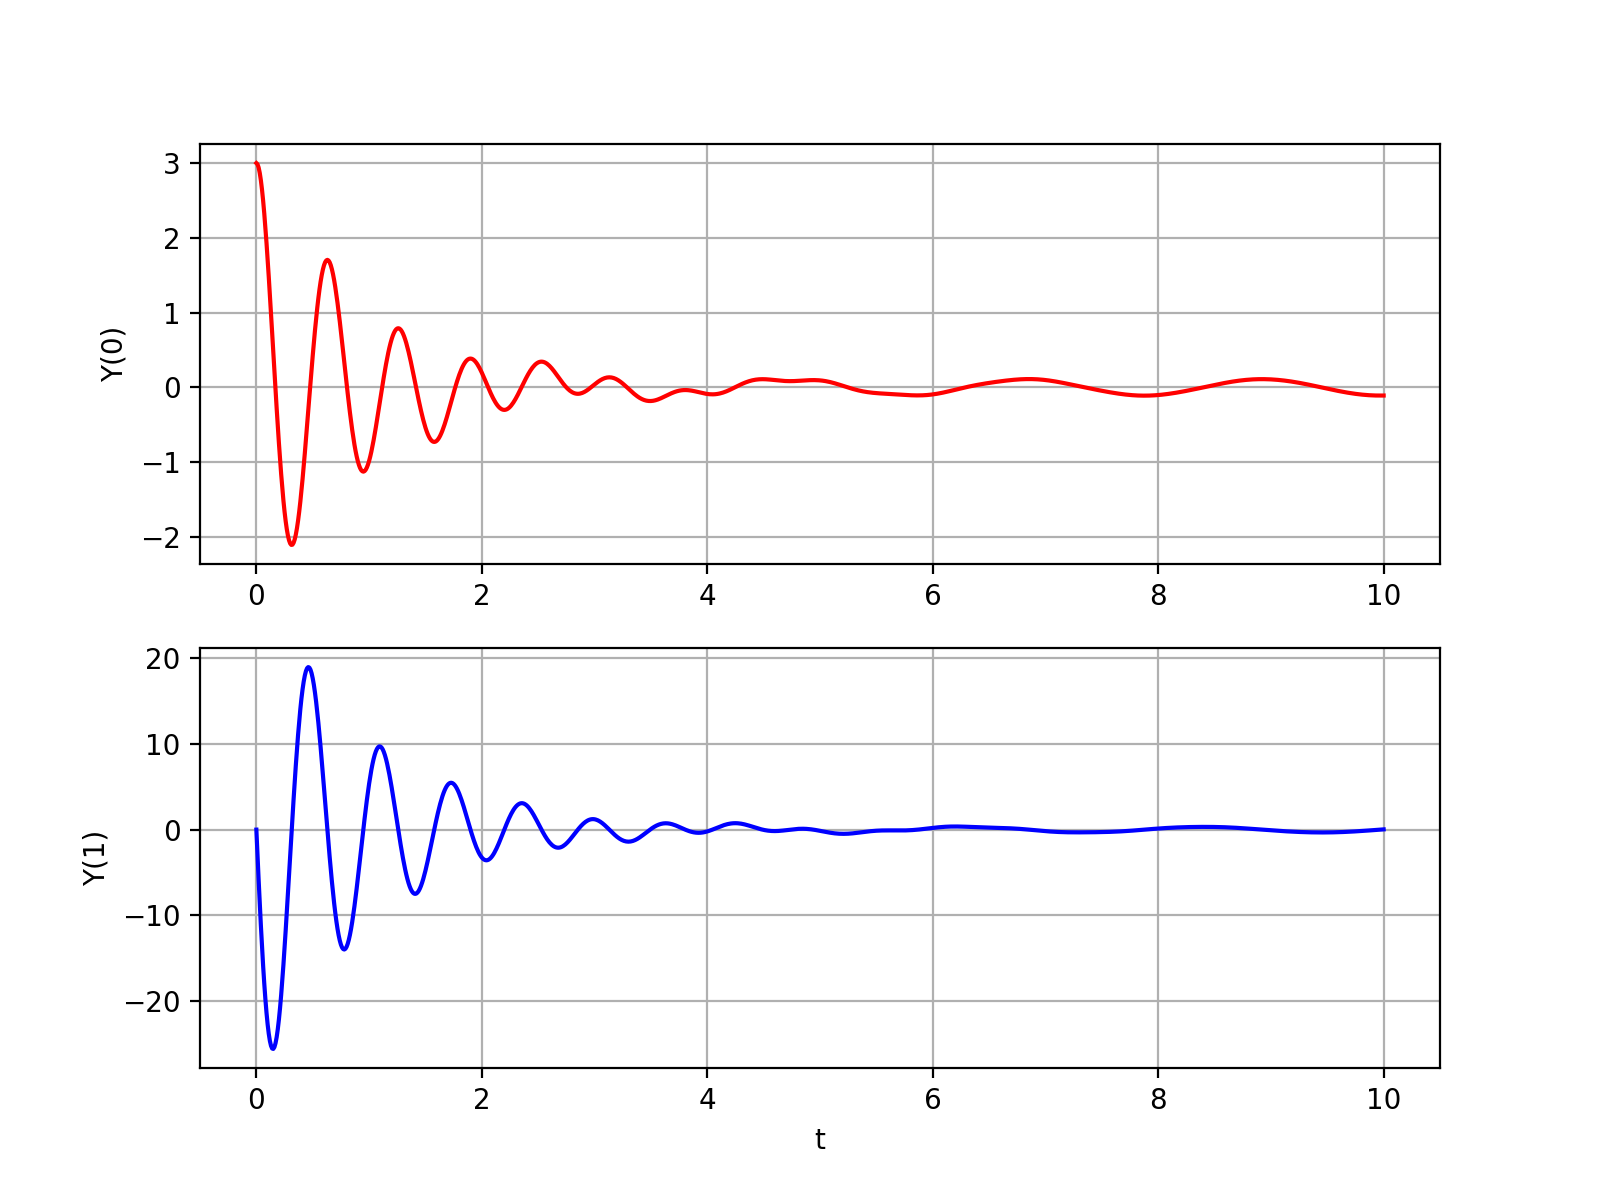

In [2]:
# rk4.py, Notebook Version

import matplotlib.pyplot as plt          #Load Matplotlib
import numpy as np

#   Initialization
a = 0.
b = 10.
n = 1000                                          
ydumb = np.zeros(2)
y = np.zeros(2)
tt=np.zeros(n+2)
yy1=np.zeros(n+2)
yy2=np.zeros(n+2)
fReturn = np.zeros(2)
k1 = np.zeros(2)
k2 = np.zeros(2)
k3 = np.zeros(2)
k4 = np.zeros(2)
y[0] = 3. 
y[1] = 0.
t = a
tt[0]=t
yy1[0]=y[0]
yy2[0]=y[1]
h = (b-a)/n
j = 0

def f( t, y, fReturn ):
    fReturn[0] = y[1]
    fReturn[1] = -100.*y[0]-2.*y[1] + 10.*np.sin(3.*t)

while (t < b):
    if ( (t + h) > b ):
        h = b - t
    f(t, y, fReturn)                              # Evaluate RHS's, return in fReturn
    k1[0] = h*fReturn[0];  k1[1] = h*fReturn[1]   # Compute function values
    for i in range(0, 2): ydumb[i] = y[i] + k1[i]/2. 
    f(t + h/2., ydumb, fReturn) 
    k2[0] = h*fReturn[0];  k2[1] = h*fReturn[1] 
    for i in range(0, 2):  ydumb[i] = y[i] + k2[i]/2. 
    f(t + h/2., ydumb, fReturn)
    k3[0] = h*fReturn[0];  k3[1] = h*fReturn[1] 
    for i in range(0, 2): ydumb[i] = y[i] + k3[i] 
    f(t + h, ydumb, fReturn) 
    k4[0] = h*fReturn[0];   k4[1] = h*fReturn[1]  
    for i in range(0, 2): 
        y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
    j+=1 
    t+=h
    tt[j]=t
    yy1[j]=y[0]  
    yy2[j]=y[1]

plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.plot(tt,yy1,'r') 
plt.grid(True)
plt.ylabel('Y(0)')
plt.subplot(2,1,2)
plt.plot(tt,yy2,'b')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Y(1)')
plt.show()

### Example: Runge-Kutta integration with Python's SciPy

Last time we investigated the example system of equations

$$\begin{align}
\frac{dy^{(0)}}{dt} &= y^{(1)}(t) ,\\
\frac{dy^{(1)}}{dt} &= -100 y^{(0)} -2 y^{(1)} + 10 \sin(3t)
\end{align}$$

Let us try to solve the same problem with Python's ODE solver. (This one does not use `rk4`; I believe it uses an implicit Adams-Moulton method, perhaps the predictor-corrector.)

Note that we always need to provide a function to calculate the derivative.

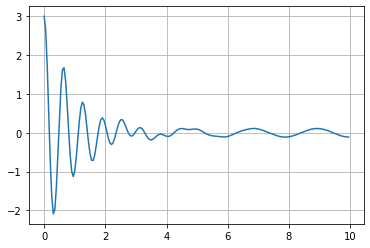

In [6]:
%matplotlib inline
import scipy.integrate as integrate

def derivs(state, t):
    fReturn[0] = state[1]                                                    
    fReturn[1] = -100.*state[0]-2.*state[1] + 10.*np.sin(3.*t)
    return fReturn

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.05
t = np.arange(0.0, 10, dt)

# initial state
state = ([3., 0.])

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)
plt.plot(t, y[:, 0])
plt.grid()
plt.show()

### Physics application: Mass on a spring

Now let's try a more physical example: a mass on the end of a spring:
$$\begin{align}
\frac{dx^{(0)}}{dt} &= x^{(1)}(t) ,\\
\frac{dx^{(1)}}{dt} &= -k x^{(0)}/m
\end{align}$$

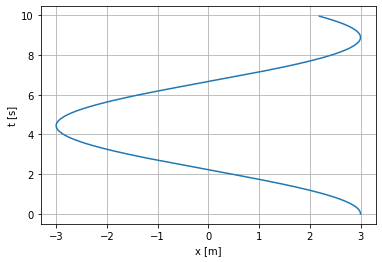

In [13]:
%matplotlib inline
import scipy.integrate as integrate

def derivs(state, t):
    k = 1.0 # N/m
    m = 2.0 # kg
    fReturn[0] = state[1]                                                    
    fReturn[1] = -k*state[0]/m
    return fReturn

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.05
t = np.arange(0.0, 10, dt)

# initial state
state = ([3., 0.])

# integrate your ODE using scipy.integrate.
x = integrate.odeint(derivs, state, t)
plt.plot(x[:, 0], t)
plt.xlabel('x [m]')
plt.ylabel('t [s]')
plt.grid()
plt.show()

Finally, let's enjoy the dynamic system that we have just modeled!

This gives you an example of animations using matplotlib.

<IPython.core.display.Javascript object>


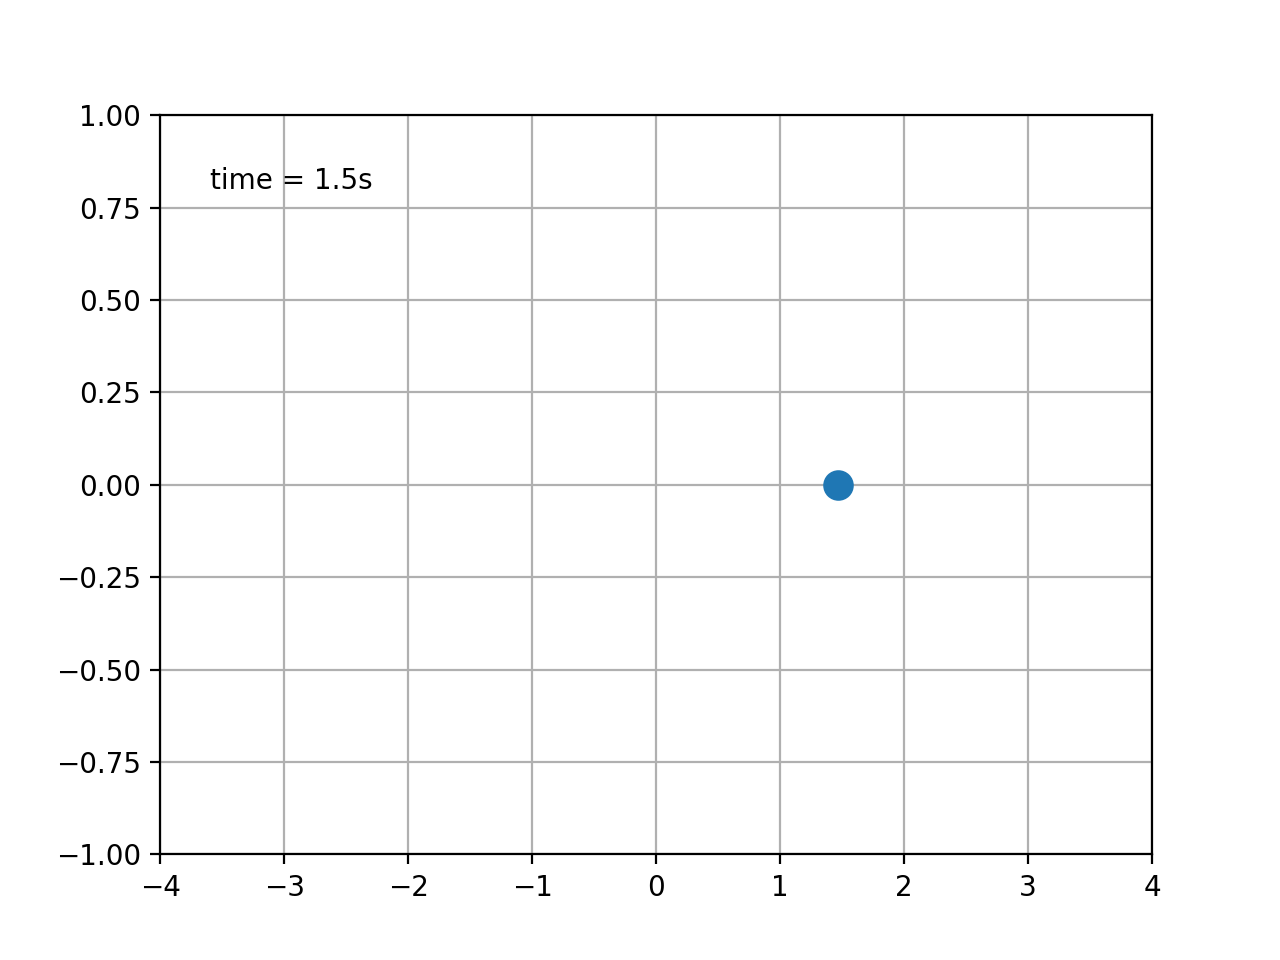

In [16]:
%matplotlib notebook
import matplotlib.animation as animation
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-4, 4), ylim=(-1, 1))
ax.grid()

mass_marker, = ax.plot([], [], 'o-', markersize=10)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    mass_marker.set_data([], [])
    time_text.set_text('')
    return mass_marker, time_text

def animate(i):
    mass_marker.set_data(x[i,0], 0.) # keep on x-axis
    time_text.set_text(time_template % (i*dt))
    return mass_marker, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t)),
                                         interval=50, blit=True, init_func=init)